<a href="https://colab.research.google.com/github/nazaribih/ML_intro/blob/main/ppproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

#df = pd.read_csv("/content/diabetes_012_health_indicators_BRFSS2015.csv")

In [ ]:
df_50_50 = pd.read_csv("/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

## Introductory analysis of the dataset

In [ ]:
df_50_50.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
df_50_50.info() # we don't have missing data, all columns are floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

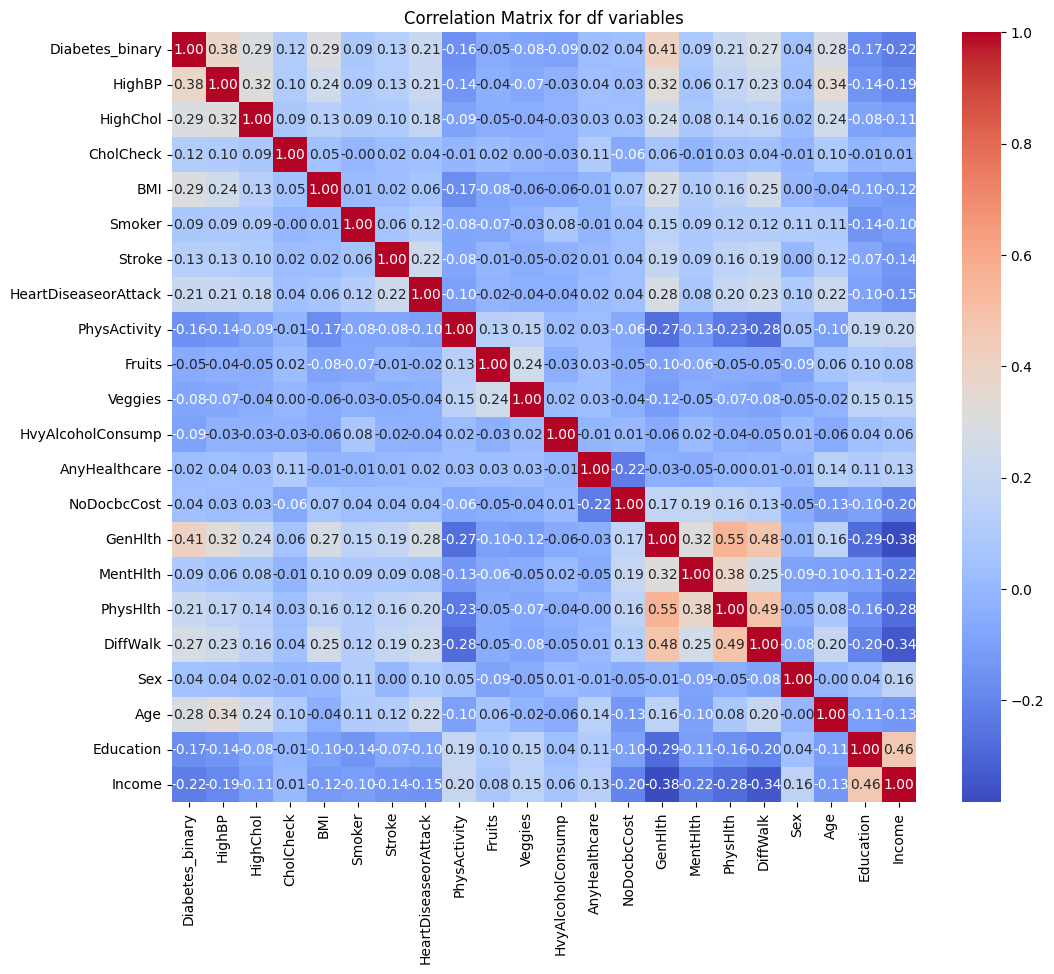

In [ ]:
# plot the correlation matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df_50_50.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for df variables")
plt.show()

The biggest correlations are of Diabetes_binary are with HighBP, HighChol, BMI, HeartDiseaseorAttack, GenHlth, PhysHlth, DiffWalk, and Age

In [ ]:
df_50_50.nunique() # although columns are floats we can see there are a lot of categorical (0-1) data

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [ ]:
#lets add some new columns to change the data that is really categorical from float to "Yes" and "No" for easier plotting
df_50_50['Diabetes_cat']= np.where(df_50_50['Diabetes_binary']==0, 'No','Yes')
df_50_50['HightBP_cat']= np.where(df_50_50['HighBP']==0, 'No','Yes')
df_50_50['HighChol_cat']= np.where(df_50_50['HighChol']==0, 'No','Yes')
df_50_50['CholCheck_cat']= np.where(df_50_50['CholCheck']==0, 'No','Yes')
df_50_50['Smoker_cat']= np.where(df_50_50['Smoker']==0, 'No','Yes')
df_50_50['Stroke_cat']= np.where(df_50_50['Stroke']==0, 'No','Yes')
df_50_50['HeartAttack_cat']= np.where(df_50_50['HeartDiseaseorAttack']==0, 'No','Yes')
df_50_50['PhysAct_cat']= np.where(df_50_50['PhysActivity']==0, 'No','Yes')
df_50_50['Fruits_cat']= np.where(df_50_50['Fruits']==0, 'No','Yes')
df_50_50['Veggies_cat']= np.where(df_50_50['Veggies']==0, 'No','Yes')
df_50_50['Alcohol_cat']= np.where(df_50_50['HvyAlcoholConsump']==0, 'No','Yes')

numerical_cols = df_50_50.select_dtypes(include='number').columns.tolist()
numerical_cols

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

## BMI distribution vs diabetes

In [ ]:
fig = px.histogram(df_50_50,
                   x='BMI',
                   marginal='box',
                   nbins=47,
                   color='Diabetes_cat',
                   color_discrete_sequence=['grey','green'],
                   title="BMI distribution vs diabetes"
                   )
fig.update_layout(bargap=0.1)
fig.show()
print("Correlation between BMI and diabetes:", df_50_50.Diabetes_binary.corr(df_50_50.BMI))

Correlation between BMI and diabetes: 0.2933727447610473


Observations:
* There are many outliers - people with high BMI
* There are more outliers with high BMi than low BMI
* the median of BMi is lower for people without diabetes and higher for ill people
* As the BMI increases the proportion of people with diabetes to the people without also increases
* This factor might be relevant for predictions

## Blood Pressure distribution vs diabetes

In [ ]:
fig = px.histogram(df_50_50,
                   x='HightBP_cat',
                   nbins=47,
                   color='Diabetes_cat',
                   color_discrete_sequence=['grey','green'],
                   title="Blood Pressure distribution vs diabetes"
                   )
fig.update_layout(bargap=0.1)
fig.show()
print("Correlation between BP and diabetes:", df_50_50.Diabetes_binary.corr(df_50_50.HighBP))

Correlation between BP and diabetes: 0.38151554890731115


Observations:
* The amount of people with diabetes is higher among people with high blood pressure - more than a half of people with high blood pressure has diabetes
* circa 1/3 of people with normal BP has diabetes
* the correlation is 0.38 so this factor might be relevant to predictions

## Cholesterol distribution vs diabetes

In [ ]:
fig = px.histogram(df_50_50,
                   x='HighChol_cat',
                   nbins=47,
                   color='Diabetes_cat',
                   color_discrete_sequence=['grey','green'],
                   title="Cholesterol distribution vs diabetes"
                   )
fig.update_layout(bargap=0.1)
fig.show()
print("Correlation between Cholesterol and diabetes:", df_50_50.Diabetes_binary.corr(df_50_50.HighChol))


Correlation between Cholesterol and diabetes: 0.2892128070886513


Observation:
* relationship is very similar to the Blood pressure
* the correlation is circa 0.29 so this factor also might be relevant

## Is Blood Pressure highly dependend on Cholesterol ?

In [ ]:
df_50_50.HighBP.corr(df_50_50.HighChol)

0.31651484912315797

Yes. Maybe we will use only one of those factors to escape redundancy (?)

## Smoking vs diabetes

In [ ]:
fig = px.histogram(df_50_50,
                   x='Smoker_cat',
                   nbins=47,
                   color='Diabetes_cat',
                   color_discrete_sequence=['grey','green'],
                   title="Smoking vs diabetes"
                   )
fig.update_layout(bargap=0.1)
fig.show()
print("Correlation between Smoking and diabetes:", df_50_50.Diabetes_binary.corr(df_50_50.Smoker))

Correlation between Smoking and diabetes: 0.08599896420800127


Observations:
* there are slightly more ill people among smokers but the difference is not drastic
* the correlation is low
* the percent of people with diabetes in each category are pretty much the same (circa 50/50)
* maybe this feature isn't relevant to the predictions? But the articles online suggest otherwise
* maybe there is correlation between smoking and other relevant factors? (Check later on the heatmap)

## Stroke vs diabetes

In [ ]:
fig = px.histogram(df_50_50,
                   x='Stroke_cat',
                   nbins=47,
                   color='Diabetes_cat',
                   color_discrete_sequence=['grey','green'],
                   title="Stroke vs diabetes"
                   )
fig.update_layout(bargap=0.1)
fig.show()
print("Correlation between Stroke and diabetes:", df_50_50.Diabetes_binary.corr(df_50_50.Stroke))

Correlation between Stroke and diabetes: 0.12542678468516735


Observations:
* class imbalance - way more data from people withou strokes
* The proportion is much higher for people who had a stroke
* Correlation is pretty high but do we know wether Stroke caused diabetes or maybe diabetes caused stroke?
* We need to check if this feature is appropriate for our predictions

## Number of People by GenHlth (their health estimation) with and without Diabetes

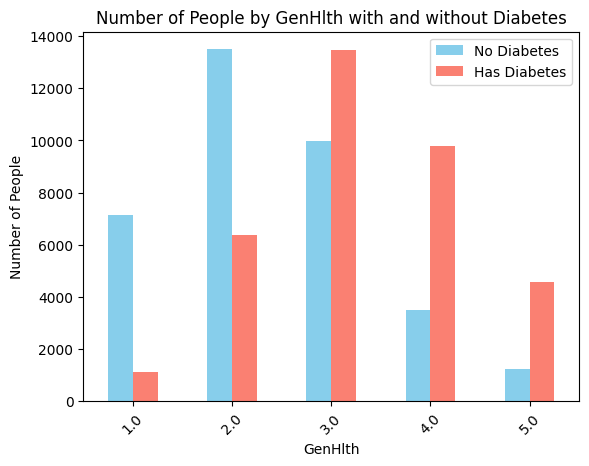

In [ ]:
# To analyze GenHlth, PhysHlth, DiffWalk, and Age vs. Diabetes_binary

# GenHlth: 1 - 5:
# 1 - excelent, 5 - poor

count_df = df_50_50.groupby(['GenHlth', 'Diabetes_binary']).size().unstack(fill_value=0)

# Plotting
count_df.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])
plt.title('Number of People by GenHlth with and without Diabetes')
plt.xlabel('GenHlth')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(['No Diabetes', 'Has Diabetes'])

plt.show()

Observations:
* The poorer GenHlth is, the bigger percentage of people has diabetes in this category
* correlation is high


## Violing plot for people who have and don't have diabetes

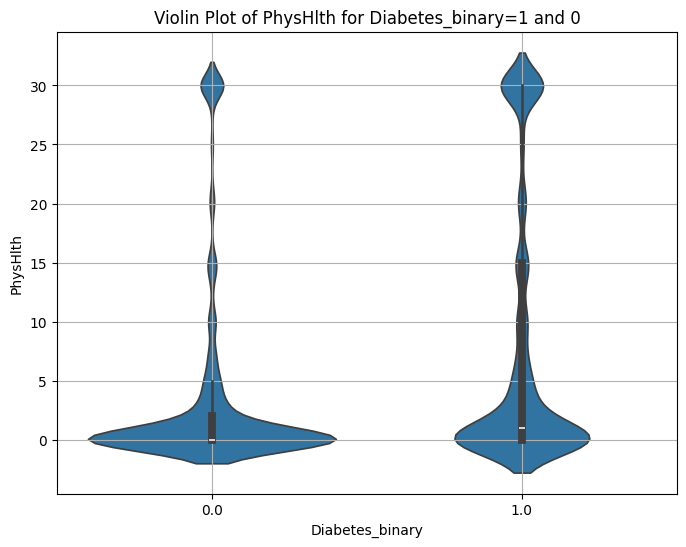

In [ ]:
# Now thinking about your physical health,
# which includes physical illness
# and injury, for how many days during
# the past 30 days was your physical health not good?
# scale 1-30 days

df0 = df_50_50

# Violing plot for people who have and don't have diabetes to check if they were feeling bad during the the last 30 days
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diabetes_binary', y='PhysHlth', data=df0)
plt.title('Violin Plot of PhysHlth for Diabetes_binary=1 and 0')
plt.xlabel('Diabetes_binary')
plt.ylabel('PhysHlth')
plt.grid(True)

Observations:
* people who have diabetes usually feel worse more days that those without
* correlations exist, but they are not so strong
* people who don't have diabetes usually feel bad very rarely - the biggest part of the distribution is in the interval of less then 3 days
* the previous observation is much "weaker" for people with diabetes, but it also exists
* there are little condensations on the top of each plots, probably because peaople may feel bad due to some other factors (diseases)

## People by Difficulty in Walking (with and without diabetes)

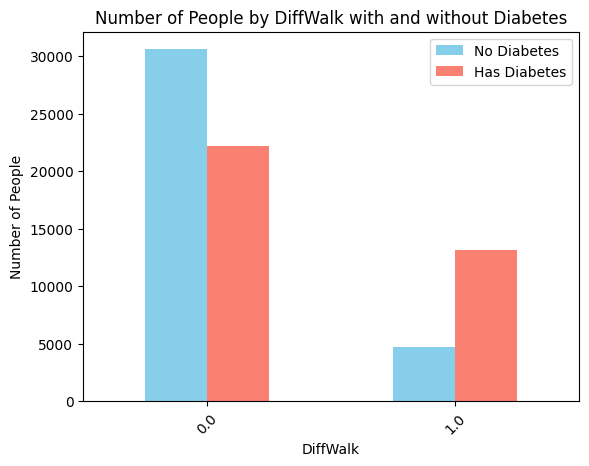

In [ ]:
# DiffWalk (0,1) - (Yes,No)

count_df = df_50_50.groupby(['DiffWalk', 'Diabetes_binary']).size().unstack(fill_value=0)

# Plotting
count_df.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])
plt.title('Number of People by DiffWalk with and without Diabetes')
plt.xlabel('DiffWalk')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(['No Diabetes', 'Has Diabetes'])

plt.show()

Observations:
* people who have diabetes experience more difficulties in walking
* correlation exist
* probably, DiffWalk also depends on other factors


##Age vs Diabetes

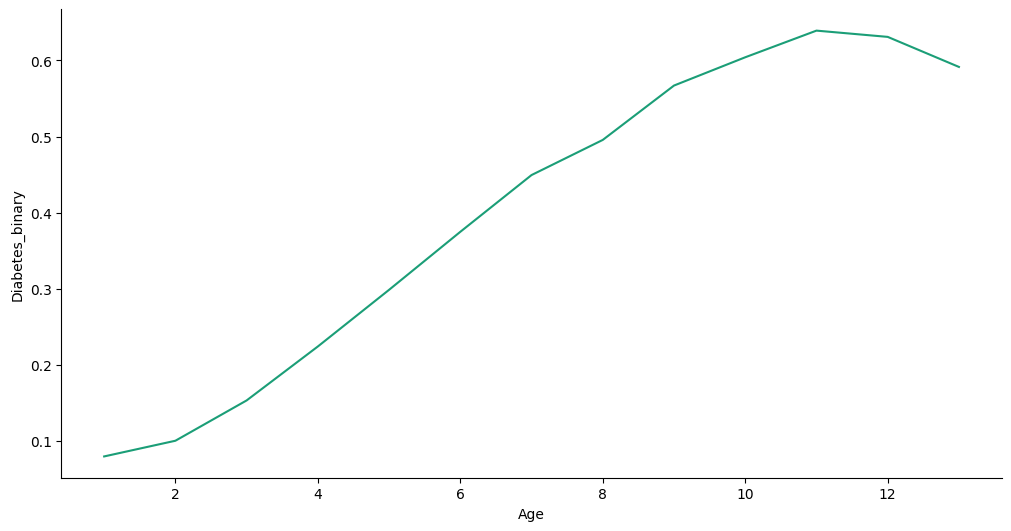

In [38]:
age_diabetes_percentage = df_50_50.groupby('Age')['Diabetes_binary'].mean().reset_index()
age_diabetes_percentage

def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Age']
  ys = series['Diabetes_binary']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = age_diabetes_percentage.sort_values('Age', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Age')
_ = plt.ylabel('Diabetes_binary')

Observations:
* Strong correlation
* The older person is, the bigger percentage of their age has diabetes
* Weird age scale (up to 13 years old)